In [21]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
from bson.json_util import dumps, loads
from time import time

client = MongoClient("localhost", 27010)
db = client.research
db.authenticate("marilu", "topsecretpasswordformarilusmongo")
db.collection_names()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  if sys.path[0] == '':


['2022-05', 'final_db', 'tmpDlTvc.renameCollection', 'labelled_authors']

In [22]:
t = time()
sample_final_db = list(db.final_db.aggregate([{ '$sample': { 'size': 100000} }]))
df = pd.DataFrame(sample_final_db)
df = df.where(pd.notnull(df), None)
print('It took', round((time()-t)/60, 2), 'minutes')

It took 1.98 minutes


In [23]:
print('df shape:', str(df.shape))
df.head()

df shape: (100000, 25)


,_id,age_source_post,author_id,birth_year,created_on,female,gender_source_post,male,nationality,nationality_in_domain,...,personality_judging,personality_perceiving,personality_sensing,personality_thinking,political_leaning,political_leaning_in_domain,post,post_body,post_id,subreddit
0,64611d30ea9e7620df83a097,None,t2_2tolbmud,None,2022-09-21 11:24:14,None,None,None,None,None,...,None,None,None,None,left,0,...and that kind of central governing body doe...,None,ipb5bkx,r/therewasanattempt
1,64649772cdd1046b549917d2,None,t2_7l94j,None,2022-05-11 21:05:55,None,None,None,None,None,...,None,None,None,None,left,0,I may have mis read it. Have covid right now I...,None,i87z01m,r/moderatepolitics
2,6463c3dcccbc750a2c2ce4df,None,t2_8ldtaib1,None,2022-06-08 04:34:43,None,None,None,None,None,...,None,None,None,None,center,0,Ever have issues from soap in the eye from def...,None,ibkal5m,r/scubadiving
3,6463c3e6ccbc750a2c35f2b8,None,t2_90p1qoil,None,2022-06-28 16:43:13,None,None,None,None,None,...,0,1,1,1,None,None,Spider-Man taillights go hard,None,ie26fut,r/genesiscoupe
4,645bb34ab53634e627c4370a,None,t2_5zypaxv0,None,2022-12-10 23:18:48,None,None,None,None,None,...,None,None,None,None,center,0,None,That's fuckin sexy,izpnsxx,r/Construction


# Posts per month

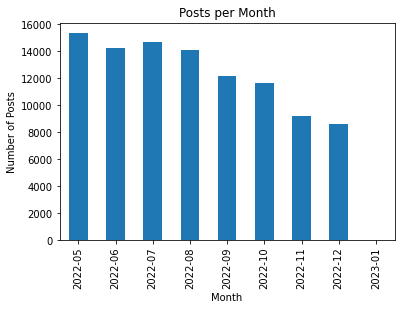

In [24]:
# plot total ammount of posts per month
month = []
for m in df['created_on']:
    month.append(m[:7])
df['month'] = month

# Count the number of posts per month
counts = df["month"].value_counts().sort_index()

# Plot the bar plot
counts.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.title("Posts per Month")
plt.show()

In [25]:
counts

2022-05    15354
2022-06    14244
2022-07    14674
2022-08    14123
2022-09    12155
2022-10    11613
2022-11     9212
2022-12     8616
2023-01        9
Name: month, dtype: int64

In [26]:
attributes=['age', 'gender', 'personality', 'politics', 'nationality']
counts = {}
for a in attributes:
    counts[a] = {}
    for month in sorted(list(df['month'].unique())):
        counts[a][month] = 0

d = {'month' : list(df['month']),
    'birth_year' : list(df['birth_year']),
    'female' : list(df['female']),
    'male' : list(df['male']),
    'extrovert' : list(df['personality_extrovert']),
     'introvert' : list(df['personality_introvert']),
    'politics' : list(df['political_leaning']),
    'nationality' : list(df['nationality'])
    
    }
for n in range(len(df)):
    if d['birth_year'][n] is not None:
        counts['age'][d['month'][n]]+=1
    if d['female'][n] is not None or d['male'][n] is not None:
        counts['gender'][df['month'][n]]+=1
    if d['extrovert'][n] is not None or d['introvert'][n]:
        counts['personality'][df['month'][n]]+=1
    if d['politics'][n] is not None:
        counts['politics'][df['month'][n]]+=1
    if d['nationality'][n] is not None:
        counts['nationality'][df['month'][n]]+=1

counts_df = pd.DataFrame(counts)
counts_df

,age,gender,nationality,personality,politics
2022-05,872,872,4411,890,9946
2022-06,802,802,4107,859,9170
2022-07,896,896,4360,890,9243
2022-08,742,742,4318,924,8826
2022-09,661,661,3692,758,7559
2022-10,647,647,3530,697,7190
2022-11,477,477,2789,536,5762
2022-12,291,291,2464,554,5557
2023-01,1,1,3,0,5


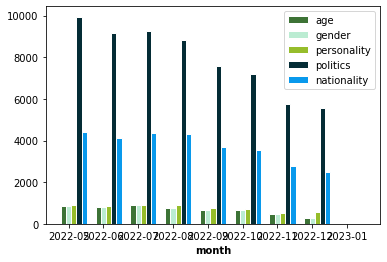

In [27]:
# plot ammount of attributes per month
# set width of bars
barWidth = 0.15
 
# set heights of bars
age = counts_df['age']
gender = counts_df['gender']
personality = counts_df['personality']
politics = counts_df['politics']
nationality = counts_df['nationality']

# Set position of bar on X axis
r1 = np.arange(len(age))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, age, color='#3d7336', width=barWidth, edgecolor='white', label='age')
plt.bar(r2, gender, color='#bbecd2', width=barWidth, edgecolor='white', label='gender')
plt.bar(r3, personality, color='#96bd2b', width=barWidth, edgecolor='white', label='personality')
plt.bar(r4, politics, color='#042c35', width=barWidth, edgecolor='white', label='politics')
plt.bar(r5, nationality, color='#0999ec', width=barWidth, edgecolor='white', label='nationality')
 
# Add xticks on the middle of the group bars
plt.xlabel('month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(age))], sorted(list(df['month'].unique())))
 
# Create legend & Show graphic
plt.legend()
plt.show()

# Attributes' distribution

In [8]:
binary_vars = {'gender':{'male': 'male', 'female': 'female'}, 
               'personality_D1':{'extroversion': 'personality_extrovert', 'introversion': 'personality_introvert'},
               'personality_D2': {'sensors': 'personality_sensing', 'intuitives': 'personality_intuitive'},
               'personality_D3':{'thinkers': 'personality_thinking', 'feelers': 'personality_feeling'},
               'personality_D4':{'judgers': 'personality_judging', 'perceivers': 'personality_perceiving'}
              }

categorical_variables = ['nationality', 'political_leaning', 'birth_year']

n_posts_per_label = {'gender':{'male': None, 'female': None},
                     'personality_D1':{'extroversion': None, 'introversion': None},
                     'personality_D2':{'sensors': None, 'intuitives': None},
                     'personality_D3':{'thinkers': None, 'feelers': None},
                     'personality_D4':{'judgers': None, 'perceivers': None},
                     'political_leaning': {},
                     'nationality': {},
                     'birth_year': {}
                    }

percentage_posts_per_label = {'gender':[{'male': None, 'female': None}, None, None],
                              'personality_D1':[{'extroversion': None, 'introversion': None}, None, None],
                              'personality_D2':[{'sensors': None, 'intuitives': None}, None, None],
                              'personality_D3':[{'thinkers': None, 'feelers': None}, None, None],
                              'personality_D4':[{'judgers': None, 'perceivers': None}, None, None],
                              'political_leaning': [{}, None, None],
                              'nationality': [{}, None, None],
                              'birth_year': [{}, None, None]
                             }

In [9]:
# count number of posts per label (binary variables)
for attribute in binary_vars.keys():
    for label in binary_vars[attribute].keys():
        n_posts_per_label[attribute][label] = df[binary_vars[attribute][label]].sum()

In [10]:
# count number of posts per label (categorical variables)
for var in categorical_variables:
    labels = df[var].unique()
    labels = [x for x in labels if x is not None]
    if var == 'birth_year':
        labels = sorted([int(x) for x in labels])
    for label in labels:
        n_posts_per_label[var][str(label)] = df[var].value_counts()[str(label)]


In [11]:
n_posts_per_label['nationality'] = dict(sorted(n_posts_per_label['nationality'].items(),
                                               key=lambda x:x[1], reverse = True))

In [12]:
for attribute in n_posts_per_label.keys():
    tot = 0
    for label in n_posts_per_label[attribute]:
        tot+= n_posts_per_label[attribute][label]
    for label in n_posts_per_label[attribute]:
        percentage_posts_per_label[attribute][0][label] = round((n_posts_per_label[attribute][label]/tot)*100, 2)
        percentage_posts_per_label[attribute][1] = round(tot)
        percentage_posts_per_label[attribute][2] = round((tot/len(df))*100, 2)

In [13]:
percentage_posts_per_label['birth_year'][0] = dict(sorted(percentage_posts_per_label['birth_year'][0].items(),
                                               key=lambda x:x[1], reverse = True))

In [14]:
# each attribute lists contain percentage of specific labels in the attribute's total posts, 
#number of posts of that attribute, percentage occupied by that attribute in the df (NB. personality is 5% in total)
percentage_posts_per_label

{'gender': [{'male': 58.53, 'female': 41.47}, 521023, 5.21],
 'personality_D1': [{'extroversion': 23.55, 'introversion': 76.45},
  606641,
  6.07],
 'personality_D2': [{'sensors': 15.1, 'intuitives': 84.9}, 606641, 6.07],
 'personality_D3': [{'thinkers': 67.05, 'feelers': 32.95}, 606641, 6.07],
 'personality_D4': [{'judgers': 54.26, 'perceivers': 45.74}, 606641, 6.07],
 'political_leaning': [{'right': 31.5, 'center': 42.09, 'left': 26.41},
  6348531,
  63.49],
 'nationality': [{'USA': 11.28,
   'Germany': 10.89,
   'United Kingdom': 10.25,
   'The Netherlands': 6.35,
   'Sweden': 4.12,
   'France': 3.96,
   'Poland': 3.92,
   'Finland': 3.8,
   'Italy': 3.75,
   'Ireland': 3.29,
   'Spain': 2.73,
   'Romania': 2.51,
   'Denmark': 2.47,
   'Turkey': 2.47,
   'Portugal': 2.42,
   'Austria': 2.16,
   'Belgium': 1.87,
   'Norway': 1.87,
   'Greece': 1.71,
   'Hungary': 1.62,
   'Czech Republic': 1.59,
   'Canada': 1.39,
   'Croatia': 1.35,
   'Switzerland': 1.14,
   'Bulgaria': 0.96,
   'U

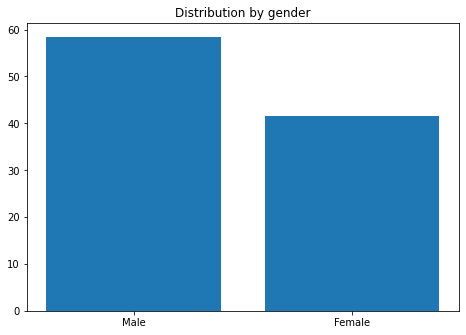

In [15]:
# plot gender
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
proportions = [percentage_posts_per_label['gender'][0]['male'], percentage_posts_per_label['gender'][0]['female']]
ax.bar(gender,proportions)
ax.set_title('Distribution by gender')
plt.show()

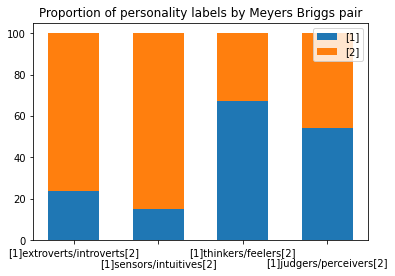

In [16]:
# plot personality
attributes = ('[1]extroverts/introverts[2]', '\n[1]sensors/intuitives[2]', '[1]thinkers/feelers[2]', '\n[1]judgers/perceivers[2]')
label_counts = {
    '[1]': np.array([percentage_posts_per_label['personality_D1'][0]['extroversion'], 
                    percentage_posts_per_label['personality_D2'][0]['sensors'],
                    percentage_posts_per_label['personality_D3'][0]['thinkers'],
                    percentage_posts_per_label['personality_D4'][0]['judgers']]),
    '[2]': np.array([percentage_posts_per_label['personality_D1'][0]['introversion'], 
                    percentage_posts_per_label['personality_D2'][0]['intuitives'],
                    percentage_posts_per_label['personality_D3'][0]['feelers'],
                    percentage_posts_per_label['personality_D4'][0]['perceivers']]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
bottom = np.zeros(4)

for label, label_counts in label_counts.items():
    p = ax.bar(attributes, label_counts, width, label=label, bottom=bottom)
    bottom += label_counts

    #ax.bar_label(p, label_type='center')

ax.set_title('Proportion of personality labels by Meyers Briggs pair')
ax.legend()

plt.show()

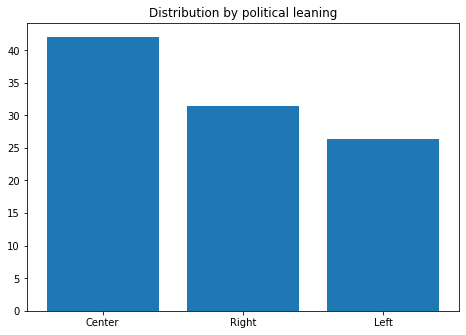

In [17]:
# plot political leaning
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Center', 'Right', 'Left']
proportions = [percentage_posts_per_label['political_leaning'][0]['center'], 
               percentage_posts_per_label['political_leaning'][0]['right'],
              percentage_posts_per_label['political_leaning'][0]['left']]
ax.bar(gender,proportions)
ax.set_title('Distribution by political leaning')
plt.show()

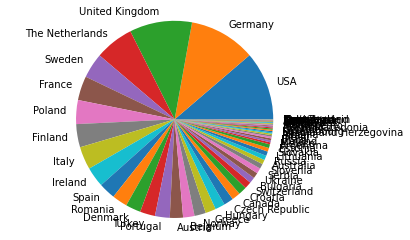

In [18]:
# Plot nationalities
labels = []
sizes = []

for x, y in n_posts_per_label['nationality'].items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels, radius = 10)

plt.axis('equal')
plt.show()

In [19]:
#df['birth_year'].astype('int', errors='ignore')[5173304].describe()
birth_year = [int(x) for x in list(df['birth_year']) if x is not None]
pd.DataFrame({'col':birth_year})['col'].describe()

count    521023.000000
mean       1988.213096
std          12.435773
min        1923.000000
25%        1981.000000
50%        1991.000000
75%        1998.000000
max        2012.000000
Name: col, dtype: float64

<BarContainer object of 74 artists>

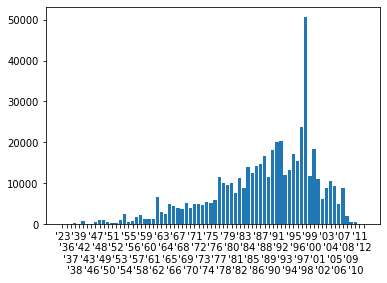

In [20]:
# Plot birth year
birth_year_labels = []
i = 0
for k in n_posts_per_label['birth_year'].keys():
    if i == 4:
        i = 0
    if i == 0:
        space = ''
    birth_year_labels.append(space + '\'' + str(k[2:]))
    space = space + '\n'
    i+=1

plt.bar(birth_year_labels, n_posts_per_label['birth_year'].values())